
<center>
    
## **Laboratory work No. 3**
#### **Done by: Nizhivenko A. D.**
### **Topic: The clustering problem**
    
</center>

#### **Aims**: to get acquainted with the task of data clustering, algorithms for its solution, to acquire practical skills in its solution, to study the capabilities of the scikit-learn library for data clustering.
   
<center>
    
### **Progress**

</center>


#### **Task 1. Construct a scatterplot matrix. From the scatterplots, determine whether and how many clusters are distinguished in the space of different pairs of features.**

Imported libraries are needed when performing laboratory work.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score

import warnings
warnings.filterwarnings("ignore")

The data set from sheet 9 of the file `data_lab3.xlsx` was successfully loaded into the DataFrame using the `read_excel` function. Infinite values and blanks for the populated data were processed.

In [2]:
df = pd.read_excel("data_lab3.xlsx", sheet_name="9", index_col=0)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.head()

,t36,t35,t34,t33,t32
Гематокрит (ht),,,,,
1,33,32,35,33,37
2,36,35,33,34,38
3,33,32,34,35,39
4,34,34,34,36,36
5,33,33,34,33,38


Using the `pairplot` function from the `seaborn` library, a matrix of scatter plots was constructed.

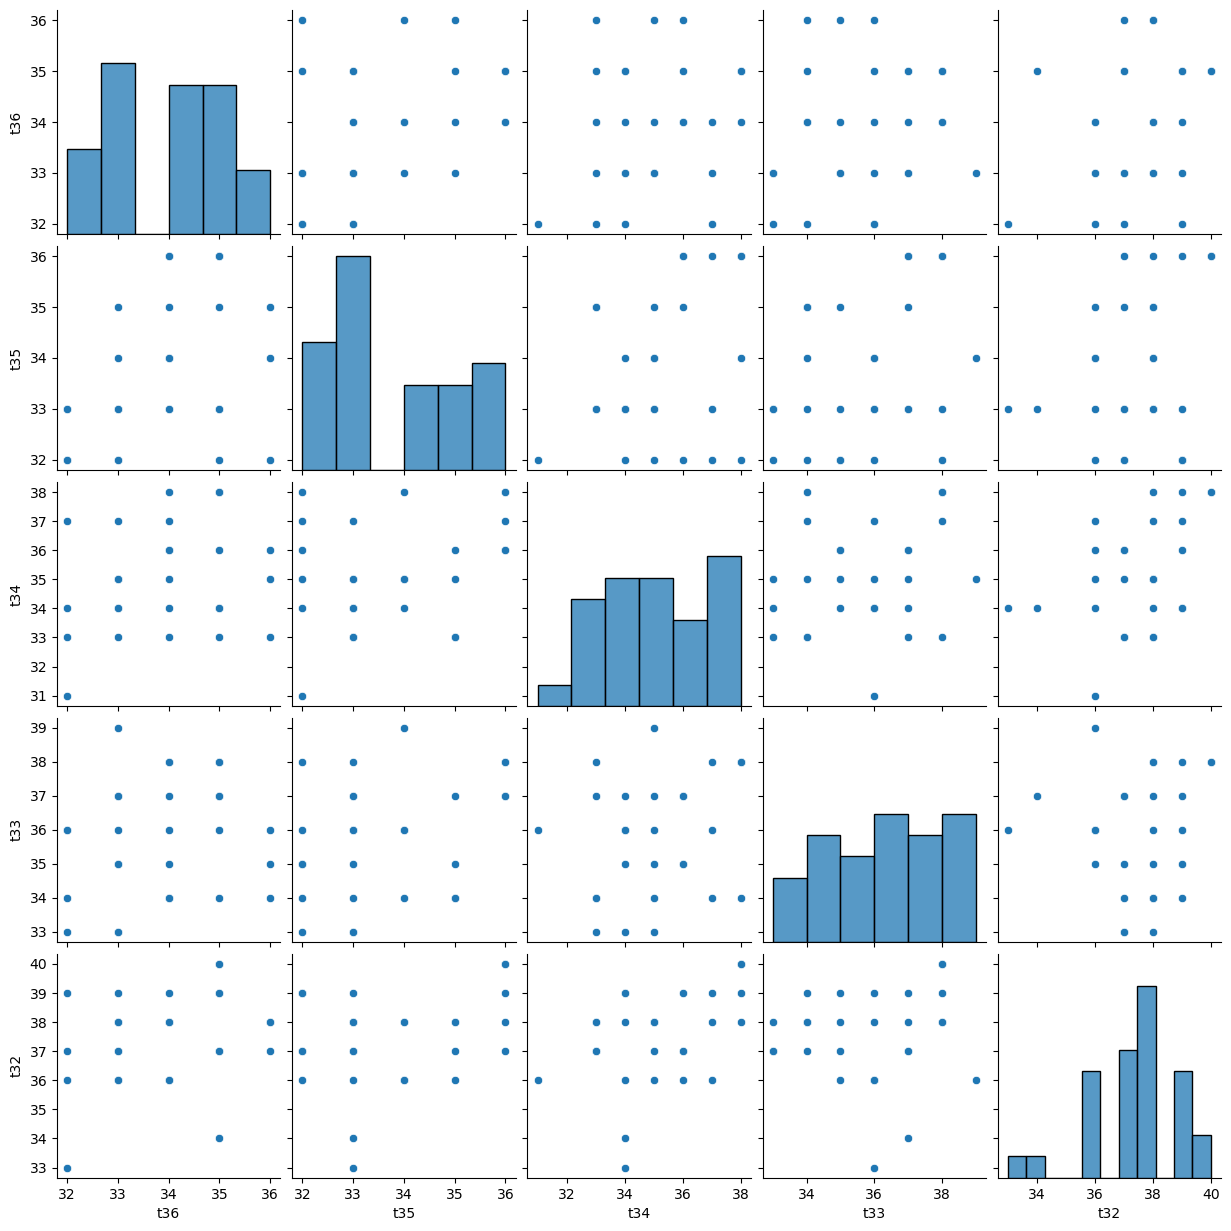

In [3]:
sns.pairplot(df)
plt.show()

Given the scatter plots for all pairs of features, we can conclude that there are no clear clusters in the data. All points are distributed fairly evenly, indicating that there are no obvious groups or clusters. This means that the number of clusters, if any, is not obvious from the plots.

#### **Task 2. Construct a graph with a separate curve for each patient showing the change in the index depending on body temperature. Based on its appearance, make a conclusion about whether the data are homogeneous or there are several clusters, and the number of clusters.**

Set the colors that will be used when creating graphs.

In [4]:
colors = sns.color_palette("bright", 4)

The DataFrame value is copied to facilitate further work.

In [5]:
X = df.copy()

The column `y` is added to the DataFrame and all its values are set to one, so that when creating a graph of parallel coordinates, all data is assigned to one cluster.

In [6]:
df["y"] = 1
df.head()

,t36,t35,t34,t33,t32,y
Гематокрит (ht),,,,,,
1,33,32,35,33,37,1
2,36,35,33,34,38,1
3,33,32,34,35,39,1
4,34,34,34,36,36,1
5,33,33,34,33,38,1


A graph of parallel coordinates is plotted using the `plotting.parallel_coordinates` function from the `pandas` library.

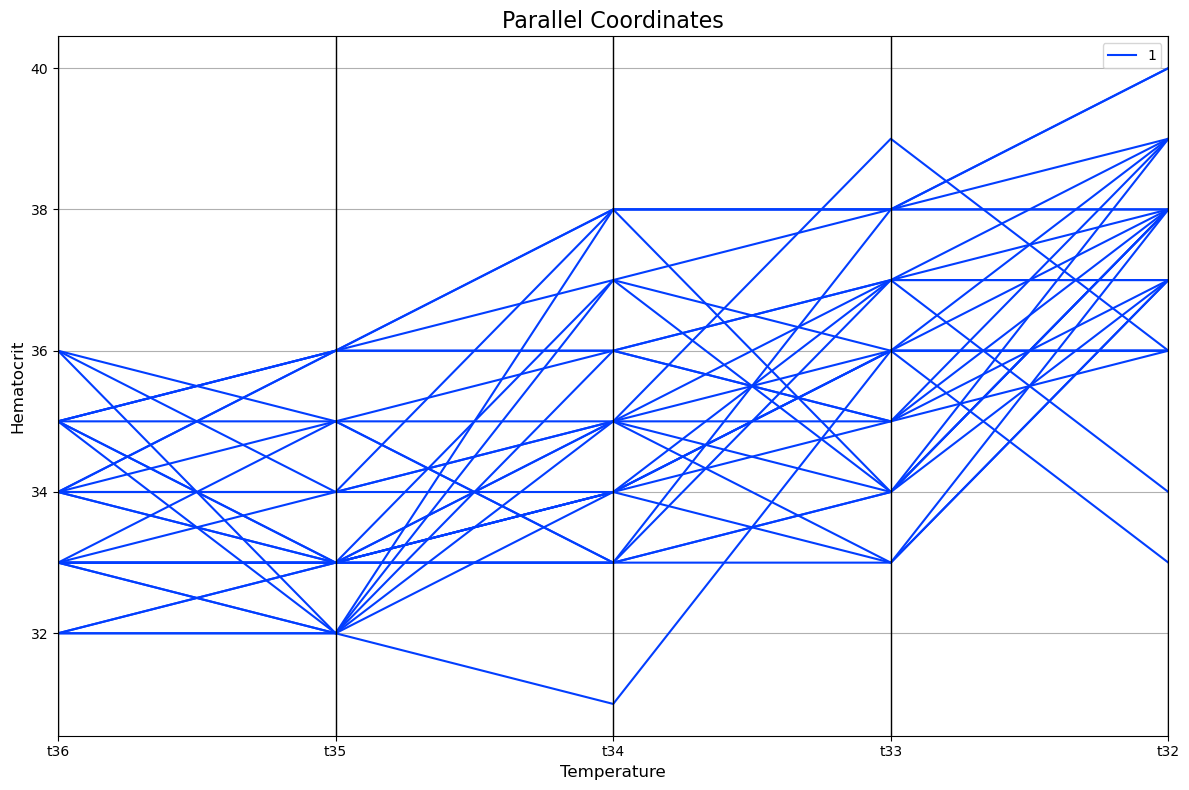

In [7]:
plt.figure(figsize=(12, 8))
plt.title("Parallel Coordinates", fontsize=16)
plt.xlabel("Temperature", fontsize=12)  
plt.ylabel("Hematocrit", fontsize=12)   
pd.plotting.parallel_coordinates(df, "y", cols=X.columns, color=colors)
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the parallel coordinate graph showing the change in hematocrit as a function of body temperature for each patient, the following conclusions can be drawn:

The data appear to be homogeneous, as the curves largely overlap and fall within the same range of values, indicating that there are no obvious deviations or discrepancies between the patients' values. No clearly defined clusters are observed, as no groups of curves are visible that form separate trajectories or clusters. The number of clusters cannot be determined based on the available graph, as the data is rather chaotic.

#### **Task 3. Divide the patients into clusters using the k-means algorithm. Try to divide the patients into 2, 3, 4, clusters, and for each division, draw a parallel coordinate graph in which the lines corresponding to patients in the same cluster should be of the same color, and for different clusters the colors should be different. From a visual point of view, what is the optimal number of clusters in your opinion?**

Patients were divided into 2, 3, and 4 clusters using the k-means algorithm. A parallel coordinate graph was also plotted for each cluster. The k-means algorithm was used with the following arguments: 

`n_clusters`- The number of clusters that the algorithm should find. This determines how many groups the data will be divided into. 

`init` - Method for initializing the initial centers of the clusters. The `k-means++` value uses an advanced initialization method that helps the algorithm converge to the optimal solution faster and improves clustering accuracy.

`n_init` - The number of times the algorithm is run with different initial centers. A value of 10 means that the algorithm will be executed 10 times with different random initializations, and the result with the smallest sum of squared deviations will be selected as the final one.

`max_iter` - The maximum number of iterations for one algorithm run. A value of 300 means that each algorithm run will not perform more than 300 iterations, regardless of whether convergence is achieved.

Dividing patients into 2 clusters using the k-means algorithm.

In [8]:
kmeans_2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300)
kmeans_2.fit(X)
print(kmeans_2.labels_)
df["y_kmeans_2"] = kmeans_2.labels_

[1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0]


Graph of parallel coordinates for dividing patients into 2 clusters using the k-means algorithm.

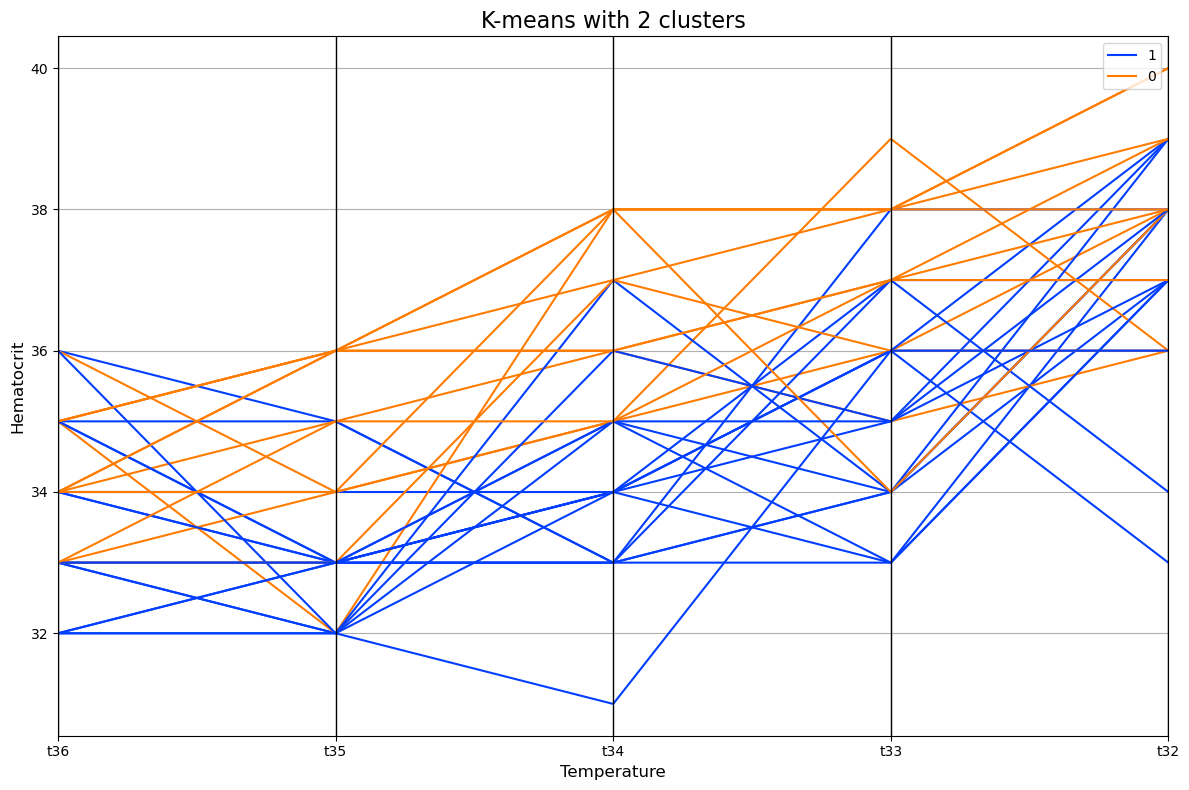

In [9]:
plt.figure(figsize=(12, 8))
plt.title("K-means with 2 clusters", fontsize=16)
plt.xlabel("Temperature", fontsize=12)  
plt.ylabel("Hematocrit", fontsize=12)   
pd.plotting.parallel_coordinates(df, "y_kmeans_2", cols=X.columns, color=colors)
plt.grid(True)
plt.tight_layout()
plt.show()

Dividing patients into 3 clusters using the k-means algorithm.

In [10]:
kmeans_3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
kmeans_3.fit(X)
print(kmeans_3.labels_)
df["y_kmeans_3"] = kmeans_3.labels_

[0 0 0 1 0 0 0 0 0 0 2 1 1 1 1 1 0 0 0 0 0 2 2 2 0 1 2 2 2]


Graph of parallel coordinates for dividing patients into 3 clusters using the k-means algorithm.

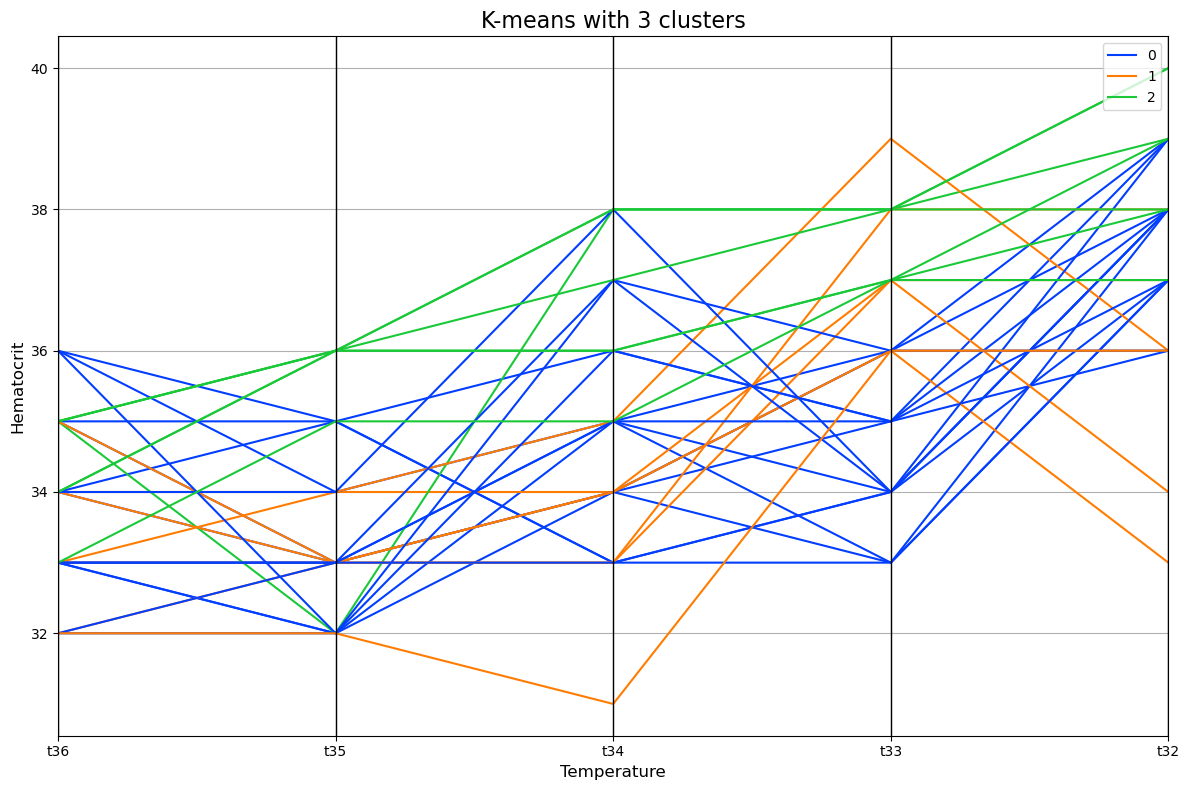

In [11]:
plt.figure(figsize=(12, 8))
plt.title("K-means with 3 clusters", fontsize=16)
plt.xlabel("Temperature", fontsize=12)  
plt.ylabel("Hematocrit", fontsize=12)   
pd.plotting.parallel_coordinates(df, "y_kmeans_3", cols=X.columns, color=colors)
plt.grid(True)
plt.tight_layout()
plt.show()

Dividing patients into 4 clusters using the k-means algorithm.

In [12]:
kmeans_4 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)
kmeans_4.fit(X)
print(kmeans_4.labels_)
df["y_kmeans_4"] = kmeans_4.labels_

[1 2 1 0 1 2 2 0 2 1 3 0 0 0 0 0 1 2 1 1 1 3 3 3 1 0 3 0 3]


Graph of parallel coordinates for dividing patients into 4 clusters using the k-means algorithm.

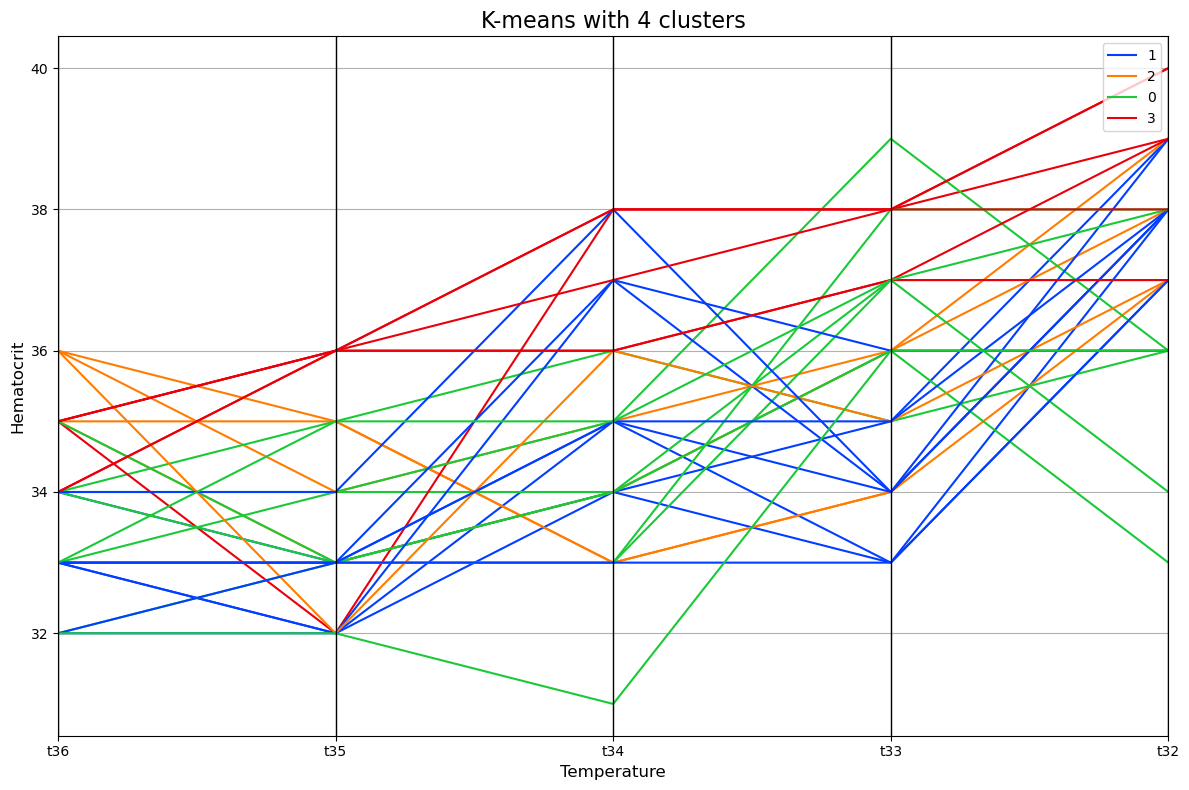

In [13]:
plt.figure(figsize=(12, 8))
plt.title("K-means with 4 clusters", fontsize=16)
plt.xlabel("Temperature", fontsize=12)  
plt.ylabel("Hematocrit", fontsize=12)   
pd.plotting.parallel_coordinates(df, "y_kmeans_4", cols=X.columns, color=colors)
plt.grid(True)
plt.tight_layout()
plt.show()

Based on visual analysis, the most optimal number of clusters is 3 clusters. In this case, the lines overlap the least and the groups are more clearly distributed, allowing for a better distinction between different groups of patients.

#### **Task 4. Estimate the optimal number of clusters for the k-means algorithm based on the clustering quality index (Calinski-Harabasz, Davies-Bouldin, Silhouette - one of them or several). Do the results of the evaluation differ from those obtained in step 3? If so, what number of clusters does the patient partitioning have a better physical interpretation in your opinion?**

The number of clusters to evaluate the k-means algorithm is set.

In [14]:
kmeans_values = [2, 3, 4]

The optimal number of clusters for the k-means algorithm is estimated based on the clustering quality index, namely Calinski-Harabasz, Davies-Bouldin, and Silhouette.

In [15]:
ch_scores = []
db_scores = []
silhouette_scores = []

for n in kmeans_values:
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300)
    labels = kmeans.fit_predict(X)
    
    ch_scores.append(calinski_harabasz_score(X, labels))
    db_scores.append(davies_bouldin_score(X, labels))
    silhouette_scores.append(silhouette_score(X, labels))

best_n_kmeans_ch = kmeans_values[np.argmax(ch_scores)]
best_n_kmeans_db = kmeans_values[np.argmin(db_scores)]
best_n_kmeans_silhouette = kmeans_values[np.argmax(silhouette_scores)]

The graphs for each of the methods for assessing the quality of clustering are constructed.

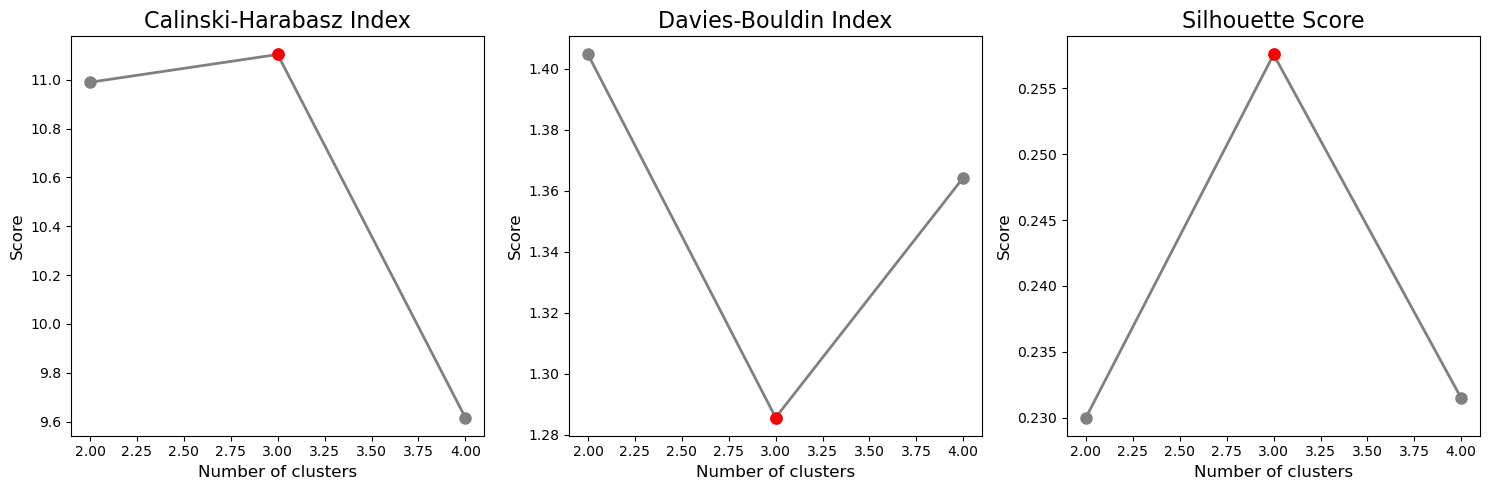

In [16]:
plt.figure(figsize=(15, 5))

plots_info = [
    ('Calinski-Harabasz Index', kmeans_values, ch_scores, best_n_kmeans_ch, max(ch_scores)),
    ('Davies-Bouldin Index', kmeans_values, db_scores, best_n_kmeans_db, min(db_scores)),
    ('Silhouette Score', kmeans_values, silhouette_scores, best_n_kmeans_silhouette, max(silhouette_scores))
]

for i, (title, x_values, y_values, best_x, best_y) in enumerate(plots_info, 1):
    plt.subplot(1, 3, i)
    plt.plot(x_values, y_values, marker="o", color="gray", markersize=8, linewidth=2)
    plt.plot(best_x, best_y, marker="o", color="red", markersize=8)
    plt.title(title, fontsize=16)
    plt.xlabel("Number of clusters", fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()

plt.show()

Analyzing the graphs showing the optimal number of clusters for the k-means algorithm based on the Calinski-Harabasz, Davies-Bouldin, and Silhouette clustering quality index, we can see that each of these methods came up with the same optimal number of clusters, namely 3 clusters. This coincides with the assumption made before.

#### **Task 5. Divide the patients into 2, 3, 4 clusters using a hierarchical clustering algorithm. Experiment with the types of hierarchical clustering (linkage argument; figure out how different linkages differ). Present the results of each partitioning in the form of a dendrogram and a parallel coordinate plot. Choose the best partitioning and the optimal number of clusters by analyzing the dendrograms and parallel coordinate plots.**

Patients were divided into 2, 3, and 4 clusters using a hierarchical clustering algorithm. A parallel coordinate plot was also created for each partition. The main parameter for the hierarchical clustering algorithm is `linkage`, which can have a value of:

`Ward`: Minimizes the variance of the clusters that are merged. This method tries to reduce the variance of clusters when they are merged, which allows you to keep clusters with a homogeneous internal structure.

`Average`: Uses the average distance between all points in two clusters. This method takes into account the average distance between all pairs of points in the two clusters.

`Complete`: Also known as maximum linkage, it uses the maximum distance between all points in the two clusters. This means that it takes into account the most distant points when merging clusters.

`Single`: Uses the minimum distance between all points in the two clusters. This means that it merges the clusters that have the closest points to each other.

For the purpose of this lab, the `linkage` argument has been set to `ward`.

Dividing patients into 2 clusters using a hierarchical clustering algorithm.

In [17]:
agglo_2 = AgglomerativeClustering(n_clusters=2, linkage="ward")
agglo_2.fit(X)
print(agglo_2.labels_)
df["y_agglo_2"] = agglo_2.labels_

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1]


Graph of parallel coordinates for dividing patients into 2 clusters using the hierarchical clustering algorithm.

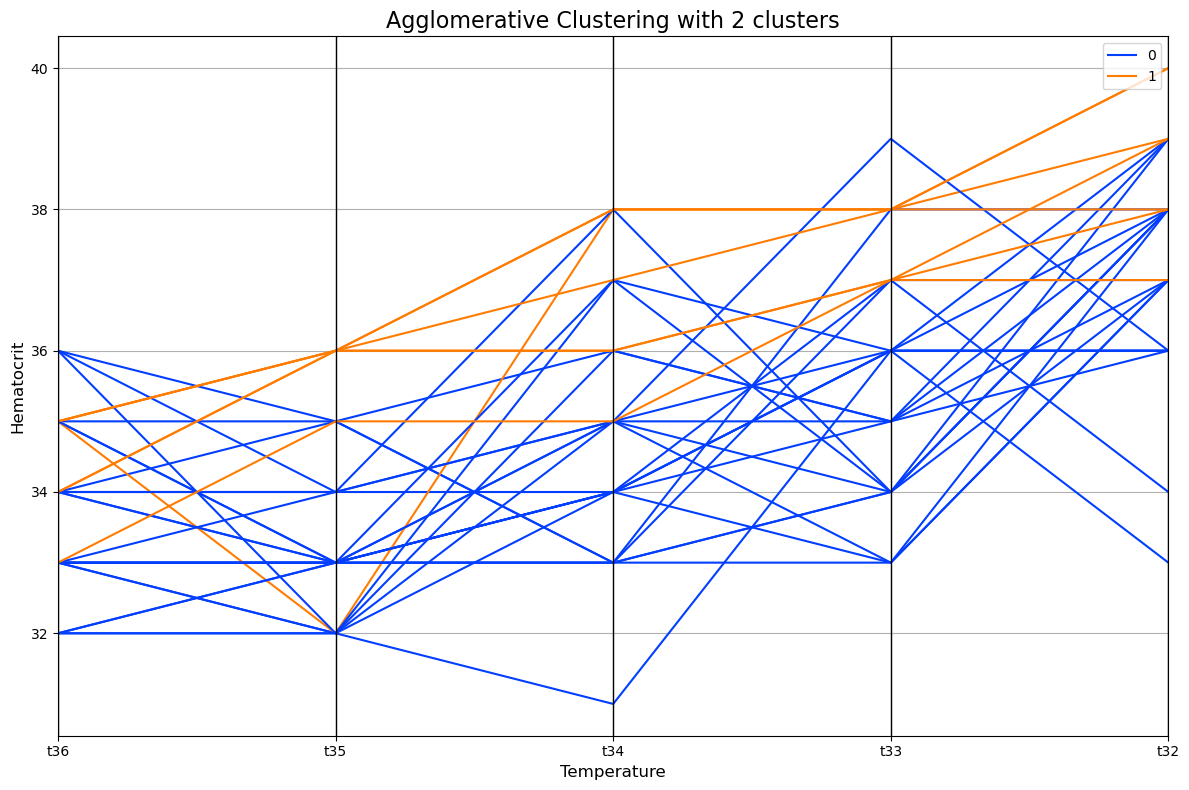

In [18]:
plt.figure(figsize=(12, 8))
plt.title("Agglomerative Clustering with 2 clusters", fontsize=16)
plt.xlabel("Temperature", fontsize=12)  
plt.ylabel("Hematocrit", fontsize=12)   
pd.plotting.parallel_coordinates(df, "y_agglo_2", cols=X.columns, color=colors)
plt.grid(True)
plt.tight_layout()
plt.show()

Dividing patients into 3 clusters using a hierarchical clustering algorithm.

In [19]:
agglo_3 = AgglomerativeClustering(n_clusters=3, linkage="ward")
agglo_3.fit(X)
print(agglo_3.labels_)
df["y_agglo_3"] = agglo_3.labels_

[0 0 0 2 0 0 0 2 0 0 1 2 2 2 2 2 0 0 2 0 0 1 1 1 0 2 1 1 1]


Graph of parallel coordinates for dividing patients into 3 clusters using the hierarchical clustering algorithm.

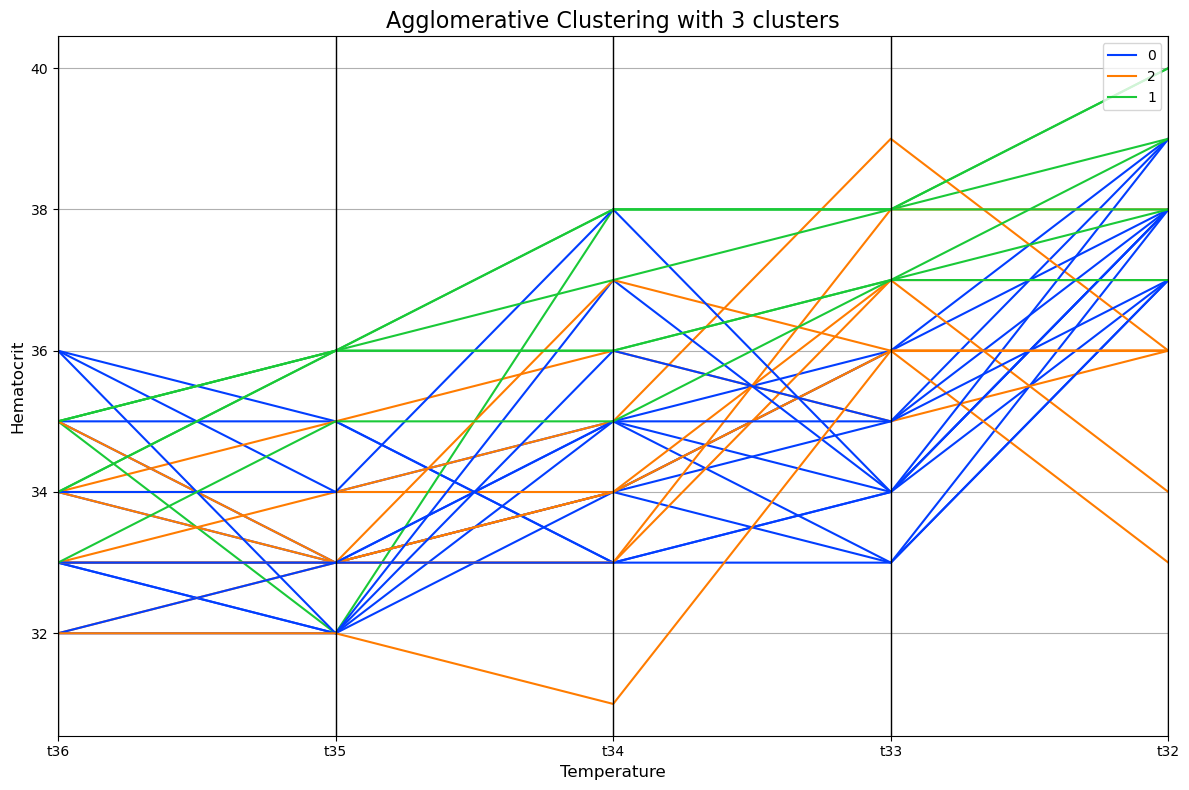

In [20]:
plt.figure(figsize=(12, 8))
plt.title("Agglomerative Clustering with 3 clusters", fontsize=16)
plt.xlabel("Temperature", fontsize=12)  
plt.ylabel("Hematocrit", fontsize=12)   
pd.plotting.parallel_coordinates(df, "y_agglo_3", cols=X.columns, color=colors)
plt.grid(True)
plt.tight_layout()
plt.show()

Dividing patients into 4 clusters using a hierarchical clustering algorithm.

In [21]:
agglo_4 = AgglomerativeClustering(n_clusters=4, linkage="ward")
agglo_4.fit(X)
print(agglo_4.labels_)
df["y_agglo_4"] = agglo_4.labels_

[2 3 2 0 2 3 3 0 3 2 1 0 0 0 0 0 2 3 0 2 2 1 1 1 2 0 1 1 1]


Graph of parallel coordinates for dividing patients into 4 clusters using the hierarchical clustering algorithm.

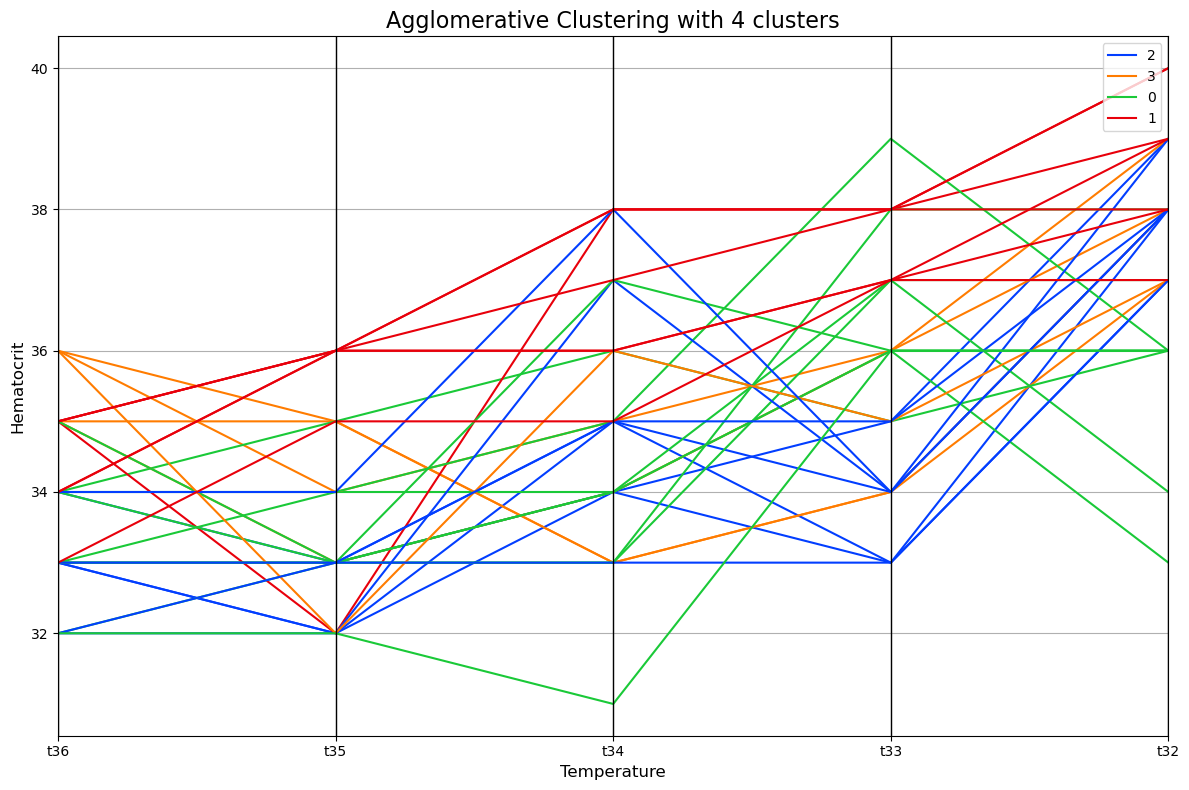

In [22]:
plt.figure(figsize=(12, 8))
plt.title("Agglomerative Clustering with 4 clusters", fontsize=16)
plt.xlabel("Temperature", fontsize=12)  
plt.ylabel("Hematocrit", fontsize=12)   
pd.plotting.parallel_coordinates(df, "y_agglo_4", cols=X.columns, color=colors)
plt.grid(True)
plt.tight_layout()
plt.show()

The dendrogram for the `ward` linkage is built.

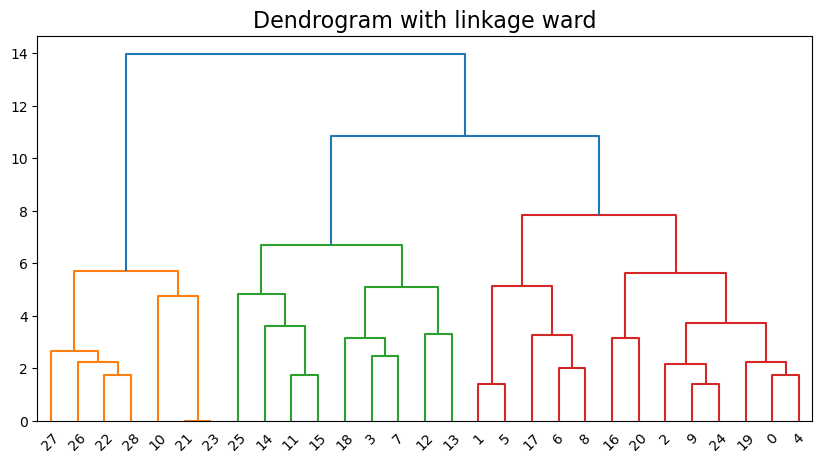

In [23]:
plt.figure(figsize=(10, 5))
plt.title("Dendrogram with linkage ward", fontsize=16)
dendrogram(linkage(X, "ward"))
plt.show()

Based on a visual analysis of the parallel coordinate plots and dendrogram, we can conclude that the optimal number of clusters for patient division is three, the same as when using the k-means algorithm. This breakdown allows for better segmentation of the data, providing a clearer separation between patient groups and reflecting the most significant differences between them.

#### **Task 6. Estimate the optimal number of clusters for hierarchical clustering (using the linkage you have chosen) based on the clustering quality index (Calinski-Harabasz, Davies-Bouldin, Silhouette - one of them or several). Do the results of the assessment differ from those obtained in step 5? If so, what number of clusters does the patient partitioning have a better physical interpretation in your opinion?**

The number of clusters is set to evaluate the hierarchical clustering algorithm.

In [24]:
agglo_values = [2, 3, 4]

The optimal number of clusters for the hierarchical clustering algorithm is estimated based on the clustering quality index, namely Calinski-Harabasz, Davies-Bouldin, Silhouette.

In [25]:
ch_scores = []
db_scores = []
silhouette_scores = []

for n in agglo_values:
    agglo = AgglomerativeClustering(n_clusters=n, linkage="ward")
    labels = kmeans.fit_predict(X)
    
    ch_scores.append(calinski_harabasz_score(X, labels))
    db_scores.append(davies_bouldin_score(X, labels))
    silhouette_scores.append(silhouette_score(X, labels))

best_n_agglo_ch = agglo_values[np.argmax(ch_scores)]
best_n_agglo_db = agglo_values[np.argmin(db_scores)]
best_n_agglo_silhouette = agglo_values[np.argmax(silhouette_scores)]

The graphs for each of the methods for assessing the quality of clustering are constructed.

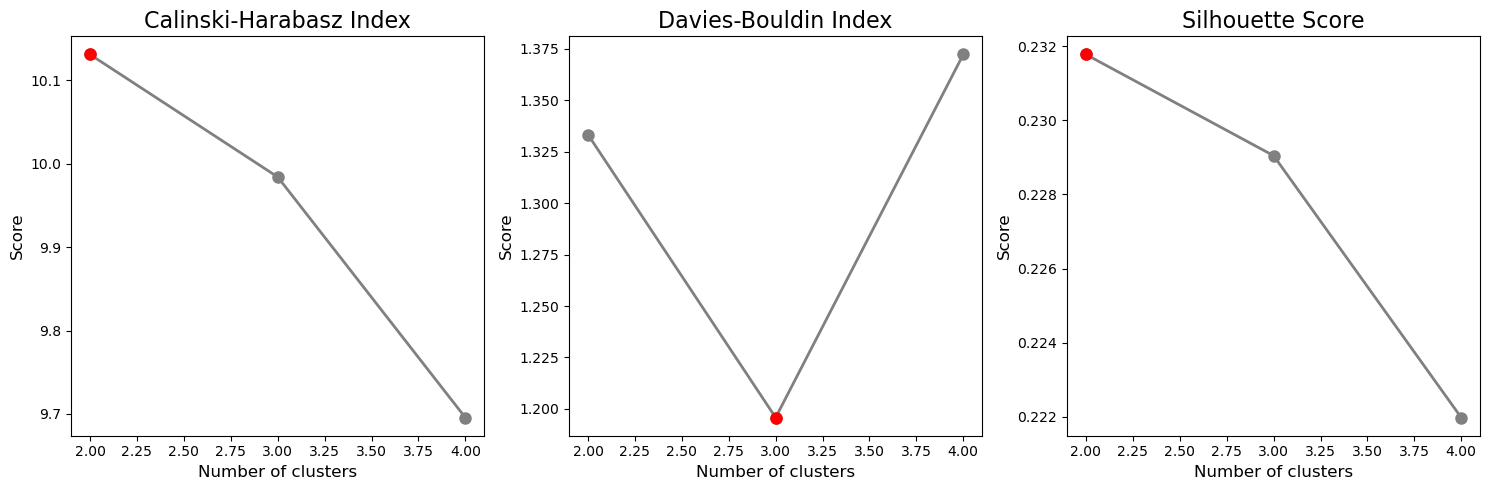

In [26]:
plt.figure(figsize=(15, 5))

plots_info = [
    ('Calinski-Harabasz Index', agglo_values, ch_scores, best_n_agglo_ch, max(ch_scores)),
    ('Davies-Bouldin Index', agglo_values, db_scores, best_n_agglo_db, min(db_scores)),
    ('Silhouette Score', agglo_values, silhouette_scores, best_n_agglo_silhouette, max(silhouette_scores))
]

for i, (title, x_values, y_values, best_x, best_y) in enumerate(plots_info, 1):
    plt.subplot(1, 3, i)
    plt.plot(x_values, y_values, marker="o", color="gray", markersize=8, linewidth=2)
    plt.plot(best_x, best_y, marker="o", color="red", markersize=8)
    plt.title(title, fontsize=16)
    plt.xlabel("Number of clusters", fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()

plt.show()

After analysing the obtained graphs, estimating the optimal number of clusters for hierarchical clustering based on the Calinski-Harabasz, Davies-Bouldin and Silhouette clustering quality index, we can conclude that the Calinski-Harabasz and Silhouette methods consider 2 clusters to be the optimal partitioning, but the Davies-Bouldin method considers 3 clusters to be the optimal value. The assumption made earlier coincides only with the Davies-Bouldin method.

#### **Task 7. Compare the partitions obtained by the k-means algorithm and the hierarchical algorithm by "manual" cluster comparison and by using the Rand Index. If the partitions are very different, which one is better from a physical point of view?**

The partitions obtained by the k-means and hierarchical clustering algorithms for 2, 3 and 4 clusters are compared by comparing the columns with the values of `y`.

In [27]:
df[["y_kmeans_2", "y_agglo_2", "y_kmeans_3", "y_agglo_3", "y_kmeans_4", "y_agglo_4"]]

,y_kmeans_2,y_agglo_2,y_kmeans_3,y_agglo_3,y_kmeans_4,y_agglo_4
Гематокрит (ht),,,,,,
1,1,0,0,0,1,2
2,1,0,0,0,2,3
3,1,0,0,0,1,2
4,1,0,1,2,0,0
5,1,0,0,0,1,2
6,1,0,0,0,2,3
7,0,0,0,0,2,3
8,0,0,0,2,0,0
9,1,0,0,0,2,3


Comparing the results of the clustering, we can see the following:

***Division into two clusters:***

When splitting into two clusters, there is a certain correspondence between the results of the k-means and hierarchical clustering algorithms. In particular:

    Cluster 0 in k-means corresponds to cluster 1 in hierarchical clustering.
    Cluster 1 in k-means corresponds to cluster 0 in hierarchical clustering.

However, there are some discrepancies. For example, rows 7, 8, 15, 19, 21 are assigned to cluster 0 in both algorithms.

***Three-cluster clustering:***.

When splitting into three clusters, the discrepancy between the results of the algorithms decreased:

    Cluster 0 in k-means corresponds to cluster 0 in hierarchical clustering.
    Cluster 1 in k-means partially corresponds to cluster 2 in hierarchical clustering.
    Cluster 2 in k-means mainly corresponds to cluster 1 in hierarchical clustering.

However, there are some differences: rows 8 and 19 are assigned to different clusters in both algorithms.

***Four clustering:***.

When splitting into four clusters, the level of disagreement between the results of the k-means and hierarchical clustering algorithms remains similar to the three clustering:

    Cluster 0 in k-means partially corresponds to cluster 0 in hierarchical clustering.
    Cluster 1 in k-means partially corresponds to cluster 2 in hierarchical clustering.
    Cluster 2 in k-means partially corresponds to cluster 3 in hierarchical clustering.
    Cluster 3 in the k-means partially corresponds to cluster 1 in the hierarchical clustering.

However, there are discrepancies, for example, lines 19 and 28 are assigned to different clusters in both algorithms.

It can be concluded that as the number of clusters increases, the discrepancy in partitioning decreases, and it can also be seen that both the k-means and hierarchical clustering algorithms have problems with clustering row 19.

The partitions obtained by the k-means and hierarchical clustering algorithms for 2, 3 and 4 clusters are compared by comparing the graphs of parallel coordinates.

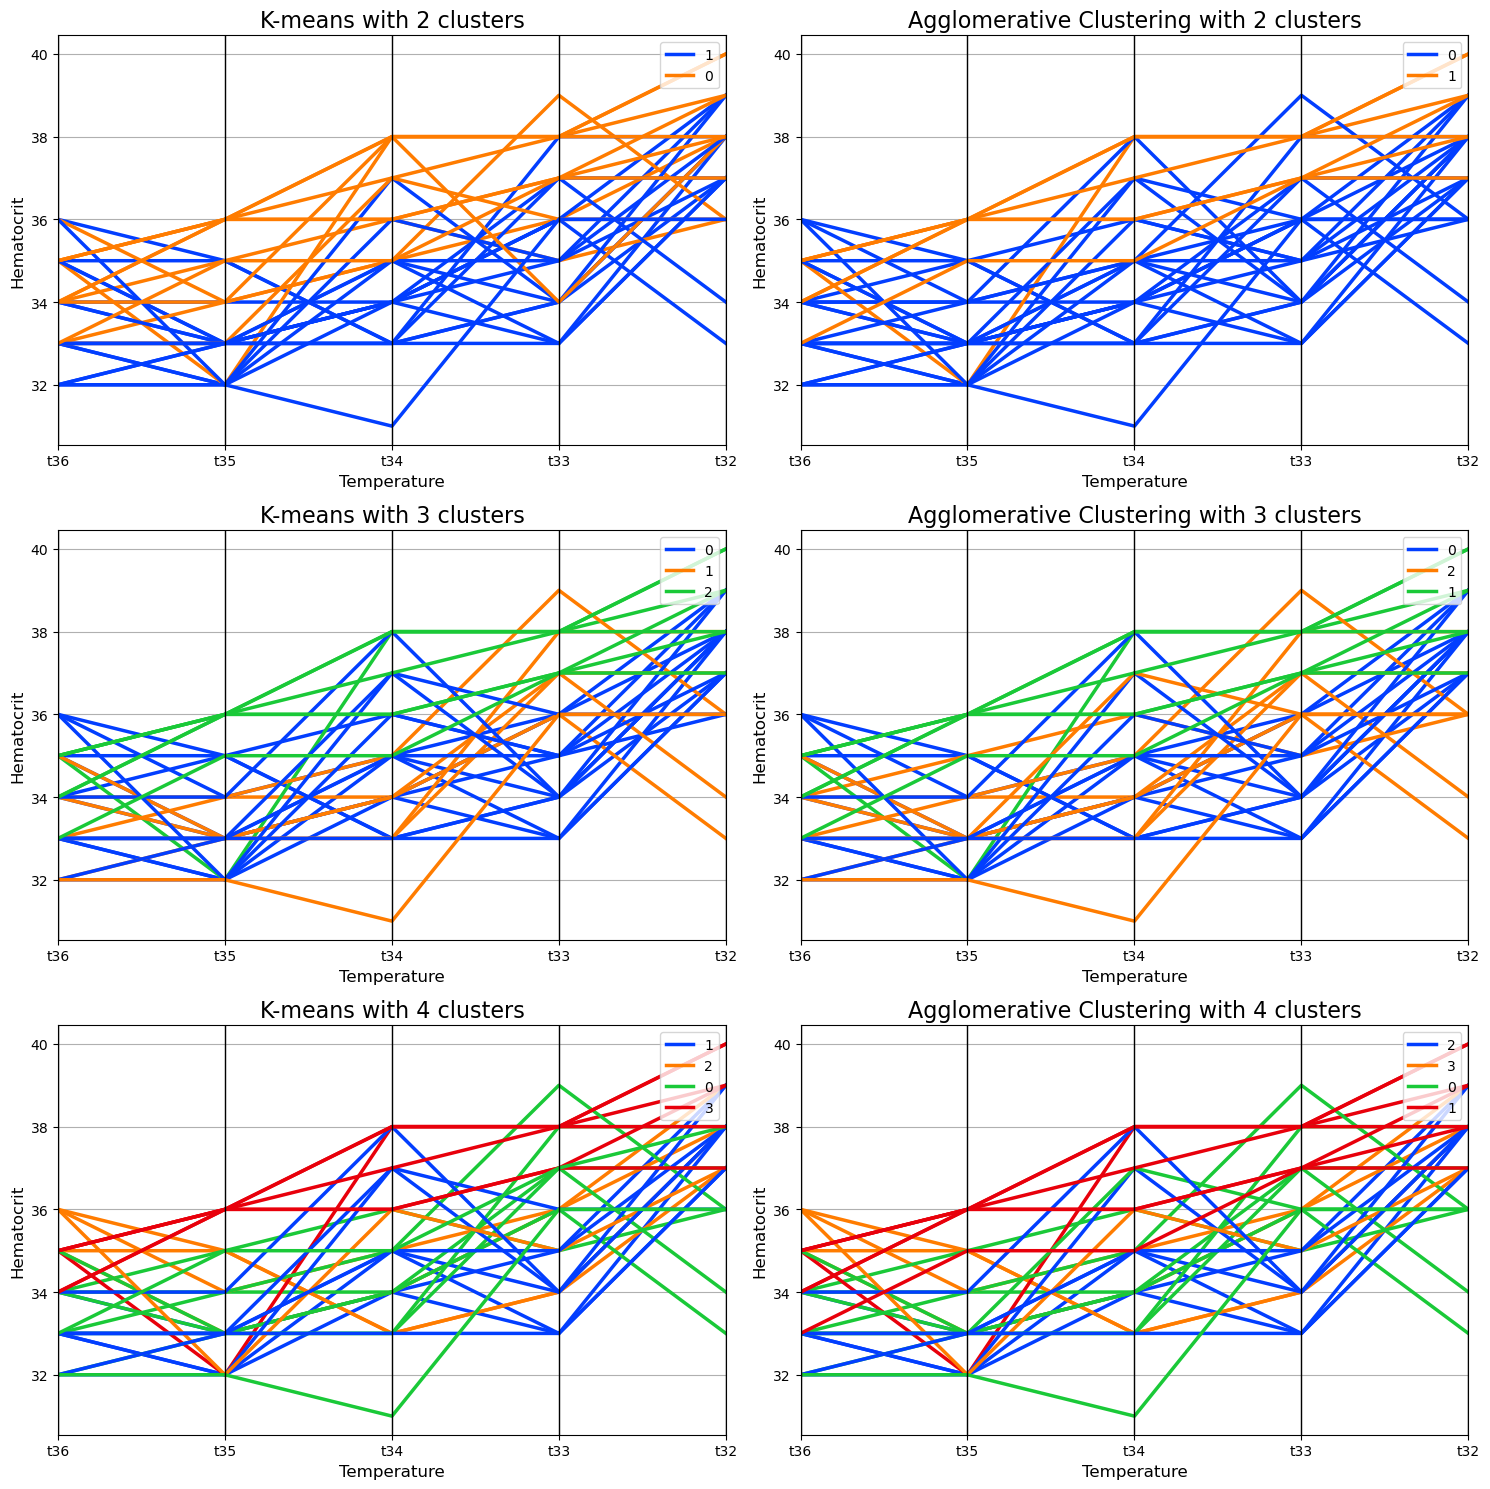

In [28]:
plt.figure(figsize=(15, 15))

plots_info = [
    (1, "K-means with 2 clusters", "y_kmeans_2"),
    (2, "Agglomerative Clustering with 2 clusters", "y_agglo_2"),
    (3, "K-means with 3 clusters", "y_kmeans_3"),
    (4, "Agglomerative Clustering with 3 clusters", "y_agglo_3"),
    (5, "K-means with 4 clusters", "y_kmeans_4"),
    (6, "Agglomerative Clustering with 4 clusters", "y_agglo_4"),
]


for i, title, cluster_col in plots_info:
    plt.subplot(3, 2, i)
    plt.title(title, fontsize=16)
    plt.xlabel('Temperature', fontsize=12)  
    plt.ylabel('Hematocrit', fontsize=12)   
    pd.plotting.parallel_coordinates(df, cluster_col, cols=X.columns, color=colors, linewidth=2.5)
    plt.grid(True)

plt.tight_layout()

plt.show()

After a visual analysis of the parallel coordinate plots, the following conclusions can be drawn:

K-means provides a clearer breakdown for all numbers of clusters, with fewer intersections between lines in each cluster.
It is also worth noting that K-means does a better job of avoiding mixed lines, especially with fewer clusters.

The hierarchical clustering shows more mixed clusters, especially for larger numbers of clusters (3 and 4). However, hierarchical clustering has more intersections between lines within clusters, which may indicate a less accurate partitioning.

Hence, K-means gives more stable results, while hierarchical clustering may be more prone to line crossings and less clear clusters.

The partitions obtained by the k-means and hierarchical clustering algorithms for 2, 3 and 4 clusters are compared by comparing the `Rand Index`.

In [29]:
n_values = [2, 3, 4]
for n in n_values:
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300)
    kmeans_labels = kmeans.fit_predict(X)

    agglo = AgglomerativeClustering(n_clusters=n, linkage="ward")
    agglo_labels = agglo.fit_predict(X)
    rand_index = adjusted_rand_score(kmeans_labels, agglo_labels)
    print(f'Adjusted Rand Index for {n} clasters: {rand_index}')

Adjusted Rand Index for 2 clasters: 0.6097308488612836
Adjusted Rand Index for 3 clasters: 0.6866350710900474
Adjusted Rand Index for 4 clasters: 0.7953697792412889


Based on the results of comparing the Adjusted Rand Index for the partitioning obtained by the k-means and hierarchical clustering algorithms for 2, 3 and 4 clusters, we can conclude that there is a certain similarity between the partitions of both methods. In particular, as the number of clusters increases, the similarity of the partitioning increases.